In [261]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
#from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
train_data=pd.read_csv('C:\\Users\\671869\\Documents\\Python Codes\\House_price\\train.csv')
test_data=pd.read_csv('C:\\Users\\671869\\Documents\\Python Codes\\House_price\\test.csv')

In [262]:
#pd.set_option('display.height',1000)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
pd.set_option('display.width',1000)

In [263]:
%matplotlib inline

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

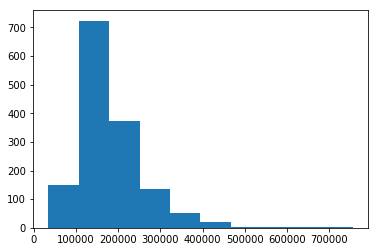

In [264]:
plt.hist(train_data.SalePrice)

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

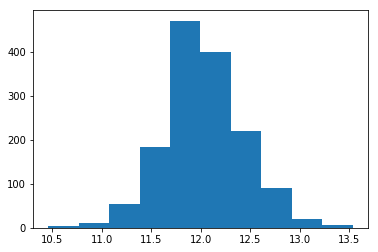

In [265]:
plt.hist(np.log(train_data.SalePrice))

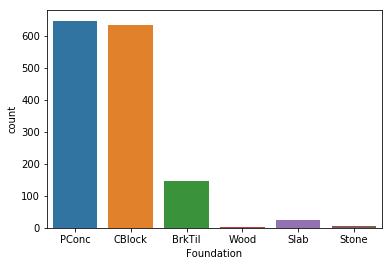

In [266]:
train_data.Foundation.value_counts()
sns.countplot(train_data.Foundation)

In [267]:
train_data.Foundation=train_data.Foundation.replace({'Wood':'Other', 'Stone':'Other'})

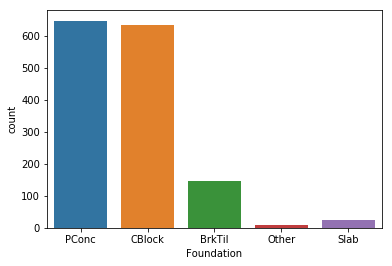

In [268]:
train_data.Foundation.value_counts()
sns.countplot(train_data.Foundation)

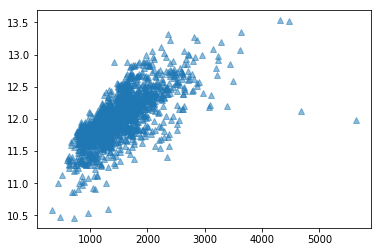

In [269]:
plt.plot(train_data.GrLivArea,np.log(train_data.SalePrice),'^',alpha=0.5)

In [270]:
train_data.loc[(train_data['GrLivArea'] ==4676)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [271]:
train_data.loc[(train_data['GrLivArea'] ==5642)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [272]:
train_data.GrLivArea=train_data.GrLivArea.replace({4676:np.nan,5642:np.nan}) 

In [273]:
#train_data.loc[train_data['Id']== 1299]
train_data[train_data.GrLivArea.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,NaN,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,NaN,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


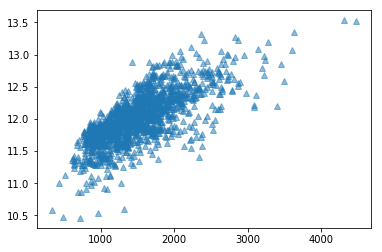

In [274]:
plt.plot(train_data.GrLivArea,np.log(train_data.SalePrice),'^',alpha=0.5)

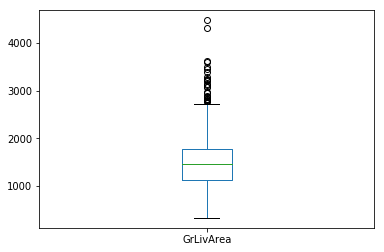

In [275]:
train_data.GrLivArea.plot(kind='box')
#train_data.MSZoning.isnull().sum()

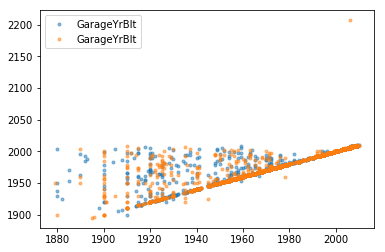

In [276]:
plt.plot(train_data.YearBuilt,train_data.GarageYrBlt,'.',alpha=0.5)
plt.plot(test_data.YearBuilt,test_data.GarageYrBlt,'.',alpha=0.5)
plt.legend()

In [277]:
train_data.groupby('Neighborhood')['SalePrice'].median()

Neighborhood
Blmngtn    191000
Blueste    137500
BrDale     106000
BrkSide    124300
ClearCr    200250
CollgCr    197200
Crawfor    200624
Edwards    121750
Gilbert    181000
IDOTRR     103000
MeadowV     88000
Mitchel    153500
NAmes      140000
NPkVill    146000
NWAmes     182900
NoRidge    301500
NridgHt    315000
OldTown    119000
SWISU      139500
Sawyer     135000
SawyerW    179900
Somerst    225500
StoneBr    278000
Timber     228475
Veenker    218000
Name: SalePrice, dtype: int64

In [278]:
test_data['SalePrice']=-999

In [279]:
total_data=pd.concat((train_data,test_data),axis=0)

In [280]:
def missing_count(data):
    null_columns=data.columns[data.isnull().any(axis=0)]
    sum_null=data[null_columns].isnull().sum()
    sum_null=sum_null.sort_values(ascending=False)
    print(sum_null)

In [281]:
missing_count(total_data)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
GrLivArea          2
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
KitchenQual        1
GarageCars         1
GarageArea         1
Electrical         1
dtype: int64


In [282]:
cat_features=['Alley','BsmtCond','BsmtQual','BsmtExposure',
              'BsmtFinType1', 'BsmtFinType2','FireplaceQu',
              'GarageType', 'GarageFinish', 'GarageQual', 
              'GarageCond','PoolQC','Fence','MiscFeature']
total_data.loc[:,cat_features]=total_data[cat_features].fillna('None')

In [283]:
cat_featureszero=['BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF',
     'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
     'GarageArea', 'GarageCars']
total_data.loc[:,cat_featureszero]=total_data[cat_featureszero].fillna(0)

In [284]:
total_data.loc[:,'GarageYrBlt']=total_data['GarageYrBlt'].fillna(total_data.YearBuilt)

In [285]:
missing_count(total_data)

LotFrontage    486
MasVnrType      24
MasVnrArea      23
MSZoning         4
Functional       2
GrLivArea        2
Utilities        2
SaleType         1
KitchenQual      1
Electrical       1
Exterior2nd      1
Exterior1st      1
dtype: int64


In [286]:
#total_data[total_data.LotFrontage.isnull()]
#total_data.LotFrontage.value_counts()
#total_data.LotFrontage.median()
total_data.LotFrontage.fillna(68,inplace=True)

In [288]:
#total_data[total_data.MasVnrType.isnull()]
#total_data.MasVnrType.value_counts()
#total_data.MasVnrType.median()
#total_data.MasVnrType.mode()
total_data.MasVnrType.fillna('None',inplace=True)
total_data.MasVnrArea.fillna(0.0,inplace=True)

In [289]:
#total_data[total_data.MSZoning.isnull()]
#total_data.MSZoning.value_counts()
total_data.MSZoning.fillna('RL',inplace=True)

In [290]:
missing_count(total_data)

Functional     2
GrLivArea      2
Utilities      2
SaleType       1
KitchenQual    1
Electrical     1
Exterior2nd    1
Exterior1st    1
dtype: int64


In [291]:
total_data[total_data.Utilities.isnull()]
total_data.Utilities.value_counts()
#total_data.Utilities.median()
#total_data.Utilities.mode()
total_data.Utilities.fillna('AllPub',inplace=True)

In [292]:
total_data[total_data.Exterior1st.isnull()]
total_data.Exterior1st.value_counts()
total_data.Exterior1st.fillna('VinylSd',inplace=True)

In [293]:
#total_data[total_data.Exterior2nd.isnull()]
#total_data.Exterior2nd.value_counts()
#total_data[total_data['Exterior1st']=='VinylSd']
total_data.Exterior2nd.fillna('VinylSd',inplace=True)

In [296]:
missing_count(total_data)

Functional     2
GrLivArea      2
SaleType       1
KitchenQual    1
Electrical     1
dtype: int64


In [297]:
total_data[total_data.Functional.isnull()]
#total_data.Functional.median()
total_data.Functional.value_counts()
total_data.Functional.fillna('Typ',inplace=True)

In [298]:
total_data[total_data.KitchenQual.isnull()]
#total_data.KitchenQual.median()
total_data.KitchenQual.value_counts()
total_data.KitchenQual.fillna('TA',inplace=True)

In [299]:
total_data[total_data.Electrical.isnull()]
#total_data.Electrical.median()
total_data.Electrical.value_counts()
total_data.Electrical.fillna('SBrkr',inplace=True)

In [300]:
missing_count(total_data)

GrLivArea    2
SaleType     1
dtype: int64


In [301]:
total_data.SaleType.mode()
total_data.SaleType.value_counts()
total_data.SaleType.fillna('WD',inplace=True)

In [302]:
#total_data.GrLivArea.mean() #1498.2516283853274
total_data.GrLivArea.median() #1444.0
#total_data.GrLivArea.value_counts()
total_data.GrLivArea.fillna(1499,inplace=True)

In [303]:
missing_count(total_data)

Series([], dtype: float64)


In [304]:
total_data[total_data.isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [305]:
total_data.dtypes.value_counts()

object     43
int64      26
float64    12
dtype: int64

In [306]:
total_data.select_dtypes(include=[object]).columns

Index([u'MSZoning', u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities', u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2', u'BldgType', u'HouseStyle', u'RoofStyle', u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2', u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'KitchenQual', u'Functional', u'FireplaceQu', u'GarageType', u'GarageFinish', u'GarageQual', u'GarageCond', u'PavedDrive', u'PoolQC', u'Fence', u'MiscFeature', u'SaleType', u'SaleCondition'], dtype='object')

In [307]:
total_data=pd.get_dummies(total_data,columns=['MSZoning',
'Street',
'Alley',
'Utilities',
'LotConfig',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'Foundation',
'Heating',
'CentralAir',
'Electrical',
'Functional',
'GarageType',
'PavedDrive',
'Fence',
'MiscFeature',
'SaleType',
'SaleCondition'])

In [308]:
#LotShape
total_data.LotShape = total_data.LotShape.replace({'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3})

In [309]:
#LandContour
#total_data.LandContour.value_counts()
total_data.LandContour = total_data.LandContour.replace({'Lvl':0, 'HLS':1, 'Bnk':2, 'Low':3})

In [310]:
#LandSlope
total_data.LandSlope.value_counts()
total_data.LandSlope = total_data.LandSlope.replace({'Gtl':0, 'Mod':1, 'Sev':2})

In [311]:
#ExterQual
#total_data.ExterQual.value_counts()
total_data.ExterQual = total_data.ExterQual.replace({'Po':0, 'Fa':1, 'TA':2, 'Gd':3,'Ex':4})

In [312]:
#ExterCond
total_data.ExterCond.value_counts()
total_data.ExterCond = total_data.ExterCond.replace({'Po':0, 'Fa':1, 'TA':2, 'Gd':3,'Ex':4})

In [313]:
#BsmtQual
#total_data.BsmtQual.value_counts()
total_data.BsmtQual = total_data.BsmtQual.replace({'None':0,'NA':0, 'Po':1, 'Fa':2, 'TA':3,'Gd':4,'Ex':5})

In [314]:
#BsmtCond
#total_data.BsmtCond.value_counts()
total_data.BsmtCond = total_data.BsmtCond.replace({'NA':0,'None':0, 'Po':1, 'Fa':2, 'TA':3,'Gd':4,'Ex':5})

In [315]:
#BsmtExposure
total_data.BsmtExposure.value_counts()
total_data.BsmtExposure = total_data.BsmtExposure.replace({'Gd':4, 'Av':3, 'Mn':2, 'No':1,'NA':0,'None':0})

In [316]:
#BsmtFinType1
#total_data.BsmtFinType1.value_counts()
total_data.BsmtFinType1 = total_data.BsmtFinType1.replace({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3,'LwQ':2,'Unf':1,'NA':0,'None':0})

In [317]:
#BsmtFinType2
#total_data.BsmtFinType2.value_counts()
total_data.BsmtFinType2 = total_data.BsmtFinType2.replace({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3,'LwQ':2,'Unf':1,'NA':0,'None':0})

In [318]:
#HeatingQC
#total_data.HeatingQC.value_counts()
total_data.HeatingQC = total_data.HeatingQC.replace({'Po':0, 'Fa':1, 'TA':2, 'Gd':3,'Ex':4})

In [319]:
#KitchenQual
#total_data.KitchenQual.value_counts()
total_data.KitchenQual = total_data.KitchenQual.replace({'Po':0, 'Fa':1, 'TA':2, 'Gd':3,'Ex':4})

In [320]:
#FireplaceQu
#total_data.FireplaceQu.value_counts()
total_data.FireplaceQu = total_data.FireplaceQu.replace({'None':0,'NA':0, 'Po':1, 'Fa':2, 'TA':3,'Gd':4,'Ex':5})

In [321]:
#GarageFinish
#total_data.GarageFinish.value_counts()
total_data.GarageFinish = total_data.GarageFinish.replace({'Fin':0, 'RFn':1, 'Unf':2, 'None':3,'NA':3})

In [322]:
#GarageQual
#total_data.GarageQual.value_counts()
total_data.GarageQual = total_data.GarageQual.replace({'None':0,'NA':0, 'Po':1, 'Fa':2, 'TA':3,'Gd':4,'Ex':5})

In [323]:
#GarageCond
#total_data.GarageCond.value_counts()
total_data.GarageCond = total_data.GarageCond.replace({'None':0,'NA':0, 'Po':1, 'Fa':2, 'TA':3,'Gd':4,'Ex':5})

In [324]:
#PoolQC
#total_data.PoolQC.value_counts()
total_data.PoolQC = total_data.PoolQC.replace({'None':0,'NA':0, 'Fa':1, 'TA':2, 'Gd':3,'Ex':4})
#total_data.PoolQC.value_counts()

In [325]:
total_data.select_dtypes(include=[object]).columns

Index([], dtype='object')

In [326]:
#create train and test processed file
#train data
total_data.loc[total_data.SalePrice!=-999].to_csv('train_data_processed',index=False)
#test data
columns=[columns for columns in total_data.columns if columns!='SalePrice']
total_data.loc[total_data.SalePrice==-999,columns].to_csv('test_data_processed',index=False)

In [327]:
train_data_new=pd.read_csv('C:\\Users\\671869\\Documents\\Python Codes\\train_data_processed.csv')
test_data_new=pd.read_csv('C:\\Users\\671869\\Documents\\Python Codes\\test_data_processed.csv')

In [328]:
#select columns with number datatype only
#train_data_number=train_data.select_dtypes(include=['number'])
train_data_number = total_data.select_dtypes(include=['object'])
total_data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_Other,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,0,0,0,7,5,2003,2003,196.0,3,2,4,3,1,6,706.0,1,0.0,150.0,856.0,4,856,854,0,1710.0,1.0,0.0,2,1,3,1,3,8,0,0,2003.0,1,2.0,548.0,3,3,0,61,0,0,0,0,0,0,2,2008,208500,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [329]:
# pull data into target (y) and predictors (X)
train_Y=train_data_new.SalePrice

In [330]:
# Create training predictors data
train_X=train_data_new.loc[:, train_data_new.columns != 'SalePrice']
#pred_columns.head()
#train_X=pred_columns
#Impute columns with missing value
#my_imputer=Imputer()
#imputed_train_X=my_imputer.fit_transform(train_X)

In [331]:
print(type(train_X),type(train_Y))

(<class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.series.Series'>)


In [332]:
#create Model
my_model=RandomForestRegressor()

#Fitting of model
my_model.fit(train_X,train_Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [337]:
from xgboost import XGBRegressor

ImportError: No module named xgboost

In [ ]:
my_model2=XGBRegressor()
my_model2.fit(train_X,train_Y)

In [ ]:
Pridict_price_xgb=my_model2.predict(test_data_new)

In [333]:
pridicted_prices=my_model.predict(test_data_new)
#print(pridicted_prices)

In [334]:
#my_second_submission=pd.DataFrame({'ID':test_data.Id,'SalePrice':pridicted_prices})
my_second_submission=pd.DataFrame({'ID':test_data.Id,'SalePrice':pridicted_prices})
my_second_submission.head()

,ID,SalePrice
0,1461,128540.0
1,1462,167713.2
2,1463,182850.0
3,1464,182023.2
4,1465,218705.6


In [335]:
my_second_submission.to_csv('My_sixth_Submission_Lin_Reg',index=False)